In [149]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import math

from auto_ts import auto_timeseries
from sklearn.metrics import mean_squared_error
import pmdarima as pm

from PIL import Image
from IPython.display import display

from semopy import Model, Optimizer, semplot
import matplotlib.pyplot as plt
%matplotlib inline

# Examen: Análisis de Datos Avanzado y Optimización en Decisiones Empresariales

## Empresa Ficticia: DataMart Solutions Inc.

### Introducción

DataMart Solutions Inc. es una empresa de tecnología que se especializa en ofrecer servicios avanzados de análisis de datos y optimización para negocios de comercio electrónico y empresas de bienes de consumo. Utiliza modelos predictivos y pruebas de hipótesis para mejorar la eficiencia operativa, aumentar la satisfacción del cliente y optimizar la asignación de presupuesto en marketing.

### Contexto General

DataMart Solutions tiene cuatro áreas clave de enfoque:

1. **Pronóstico de Ventas**: La empresa necesita prever las ventas mensuales para optimizar la gestión de inventario y ajustar la producción de sus clientes.
2. **Satisfacción del Cliente**: Utilizan análisis avanzados para comprender los factores que influyen en la satisfacción del cliente y mejorar la experiencia del usuario.
3. **Pricing**: Utilizan análisis estadísticos inferenciales para ayudar a establecer el precio de sus productos.
4. **Estrategias de Marketing**: Optimización de la asignación de presupuesto para adquisición de clientes en varios canales publicitarios.

---

## Instrucciones Generales

- Este examen se centra en aplicar técnicas avanzadas de análisis de datos y optimización en un contexto práctico.
- Utiliza Python y, cuando sea necesario, herramientas como `auto-ts`, `scipy.optimize`, y `statsmodels`.
- Asegúrate de proporcionar tus razonamientos, interpretaciones y pasos detallados para cada pregunta.

---

## Parte 1: Pronóstico de Ventas Mensuales con `auto-ts` (25 puntos)

**Contexto**  
DataMart Solutions necesita prever las ventas mensuales de sus principales productos para el próximo año, ya que han experimentado fluctuaciones en las ventas debido a factores estacionales. Estos pronósticos permitirán a DataMart gestionar mejor el inventario y planificar campañas de marketing más efectivas.

**Ejercicio**  
1. **Construcción del Modelo (15 puntos):**  
   - Utiliza la librería `auto-ts` (o Prophet, ML y ARIMA de manera separada en caso de que no te sirva la paquetería), y los datos de ventas de los últimos tres años para construir un modelo de pronóstico de las ventas mensuales para el próximo año.
   - Realiza una división del conjunto de datos en entrenamiento (80%) y prueba (20%).
   - Genera un gráfico que muestre las ventas históricas, las predicciones del modelo en el conjunto de prueba y las predicciones para los próximos 12 meses.
   - Calcula el RMSE en el conjunto de prueba y muestra el gráfico de las ventas futuras predichas.

2. **Recomendación de Inventario (10 puntos):**  
   - Basándote en la predicción de ventas para los próximos 12 meses, elabora dos recomendaciones sobre cómo DataMart debería ajustar la gestión de inventario. Considera picos y tendencias en las ventas para definir estrategias.



### Visualizar datos y separación de training y testing

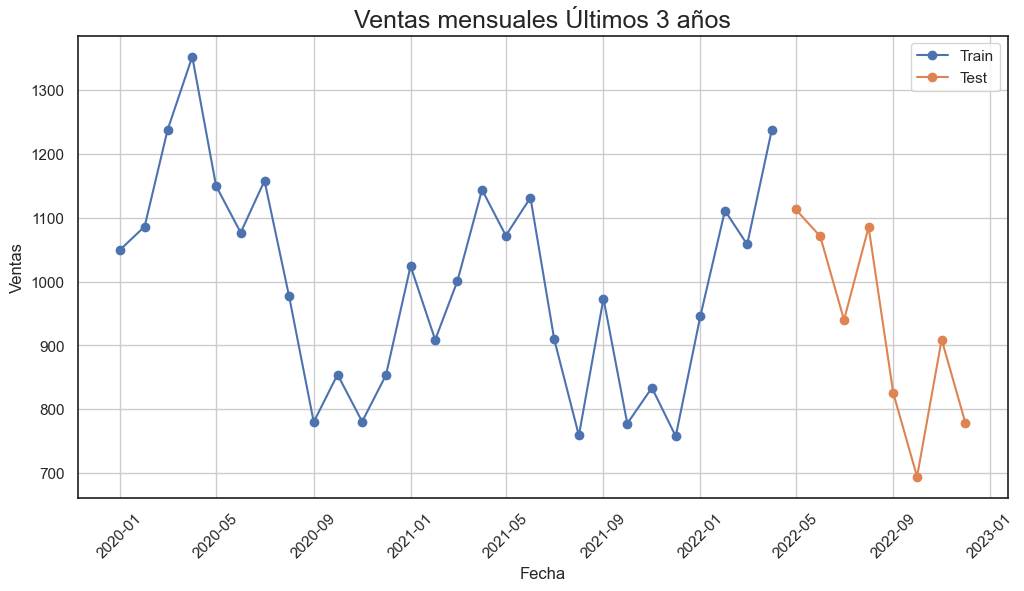

In [85]:
sales = pd.read_csv('ventas_mensuales.csv', parse_dates=['Fecha'])
sales.set_index('Fecha', inplace=True)

train_size = int(0.8 * len(sales))
train_df = sales[:train_size]
test_df = sales[train_size:]

plt.figure(figsize=(12,6))
plt.plot(train_df.index, train_df['Ventas'], marker='o', label='Train')
plt.plot(test_df.index, test_df['Ventas'], marker='o', label='Test')
plt.title('Ventas mensuales Últimos 3 años', fontsize=18)
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Creación de modelos para el pronóstico

#### Auto TS

In [86]:
model = auto_timeseries(
    score_type='rmse',       # Métrica de evaluación
    time_interval='M',       # Intervalo mensual
    non_seasonal_pdq=None,   # Para modelos SARIMAX
    seasonality=True,        # Deshabilitar búsqueda de estacionalidad (se puede cambiar)
    model_type='best',       # Seleccionar el mejor modelo
    verbose=2                # Nivel de verbosidad
)

Start of Fit.....
    Target variable given as = Ventas
Start of loading of data.....
    Inputs: ts_column = Fecha, sep = ,, target = ['Ventas']
    Using given input: pandas dataframe...
    train time series Fecha column is the index on test data...
    train data shape = (28, 1)
Alert: Could not detect strf_time_format of Fecha. Provide strf_time format during "setup" for better results.
setting maxlag to a low number = 5

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 5 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model


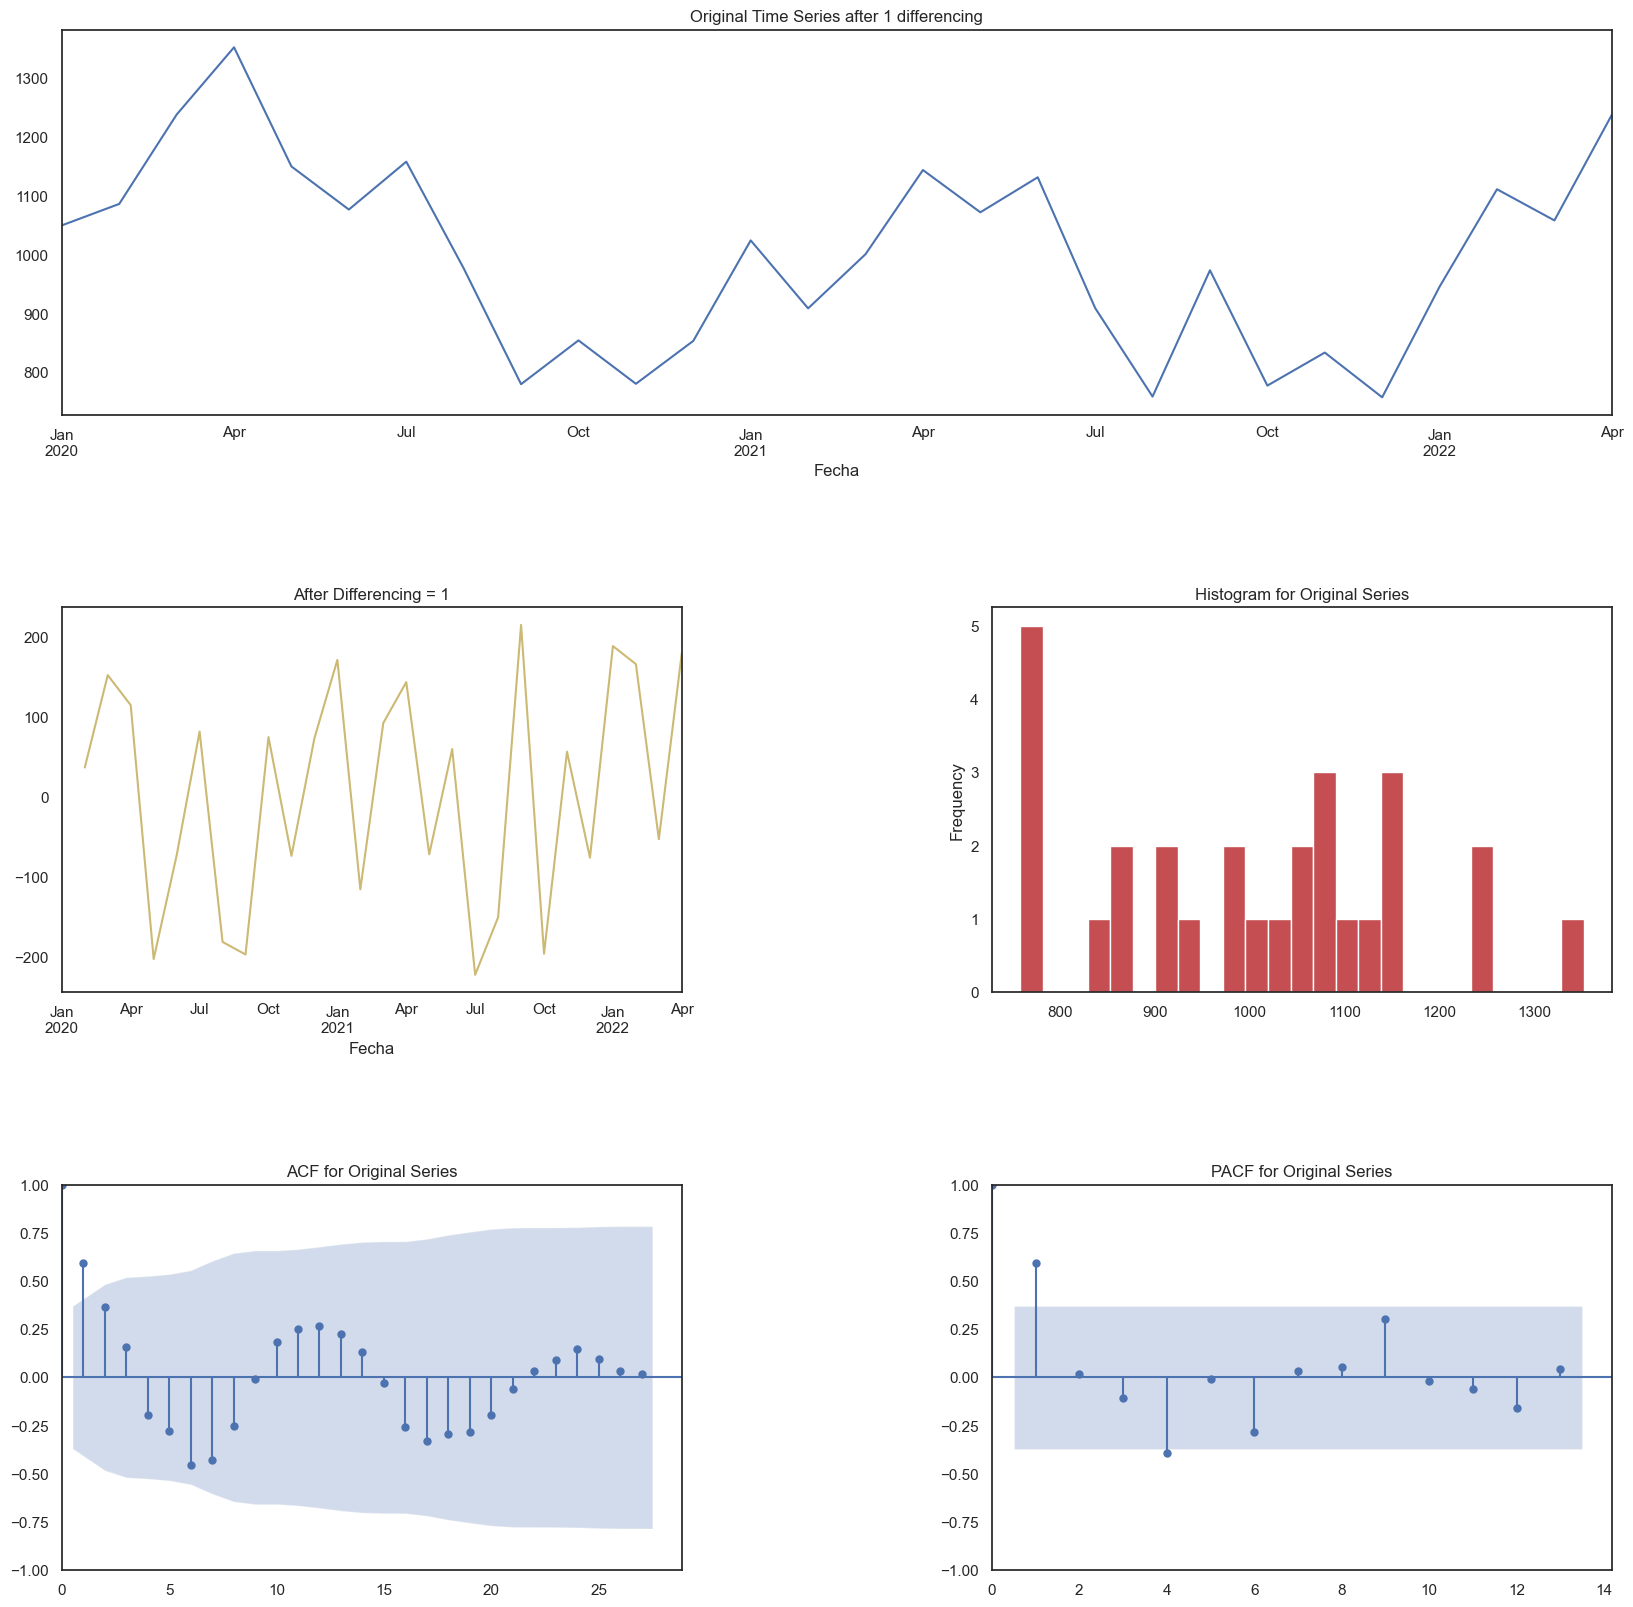

16:12:26 - cmdstanpy - INFO - Chain [1] start processing
16:12:26 - cmdstanpy - INFO - Chain [1] done processing


Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100}
    Fit-Predict data (shape=(28, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding monthly seasonality to Prophet with period=12, fourier_order=12 and prior_scale=0.10
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 3 Test Shape: 5
    RMSE = 435.44
    Std Deviation of actuals = 123.39
    Normalized RMSE (as pct of std dev) = 353%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 8 Test Shape: 5


16:12:27 - cmdstanpy - INFO - Chain [1] start processing
16:12:27 - cmdstanpy - INFO - Chain [1] done processing
16:12:27 - cmdstanpy - INFO - Chain [1] start processing
16:12:27 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 235.08
    Std Deviation of actuals = 89.19
    Normalized RMSE (as pct of std dev) = 264%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 13 Test Shape: 5
    RMSE = 317.28
    Std Deviation of actuals = 87.52
    Normalized RMSE (as pct of std dev) = 363%
Cross Validation window: 3 completed

Fold Number: 4 --> Train Shape: 18 Test Shape: 5


16:12:27 - cmdstanpy - INFO - Chain [1] start processing
16:12:27 - cmdstanpy - INFO - Chain [1] done processing
16:12:27 - cmdstanpy - INFO - Chain [1] start processing
16:12:27 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 114.60
    Std Deviation of actuals = 80.72
    Normalized RMSE (as pct of std dev) = 142%
Cross Validation window: 4 completed

Fold Number: 5 --> Train Shape: 23 Test Shape: 5
    RMSE = 269.69
    Std Deviation of actuals = 162.17
    Normalized RMSE (as pct of std dev) = 166%
Cross Validation window: 5 completed


16:12:27 - cmdstanpy - INFO - Chain [1] start processing



-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 242.93
    MSE (Mean Squared Error = 86280.53
    MAPE (Mean Absolute Percent Error) = 24%
    RMSE (Root Mean Squared Error) = 293.7355
    Normalized RMSE (MinMax) = 49%
    Normalized RMSE (as Std Dev of Actuals)= 180%
Time Taken = 1 seconds


16:12:27 - cmdstanpy - INFO - Chain [1] done processing


  End of Prophet Fit


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 3 Test Shape: 5

    Finding the best parameters using AutoArima:
Exception occurred while building Auto SARIMAX model...
There are no more samples after a first-order seasonal differencing. See http://alkaline-ml.com/pmdarima/seasonal-differencing-issues.html for a more in-depth explanation and potential work-arounds.
    Auto SARIMAX model error: predictions not available.


Building VAR Model - best suited for small datasets < 1000 rows and < 10 columns



No VAR model created since no explanatory variables given in data set


Building ML Model



Creating 2 lagged variables for Machine Learning model...
    You have set lag = 3 in auto_timeseries setup to feed prior targets. You cannot set lags > 10 ...
### Be careful setting dask_xgboost_flag to True since da

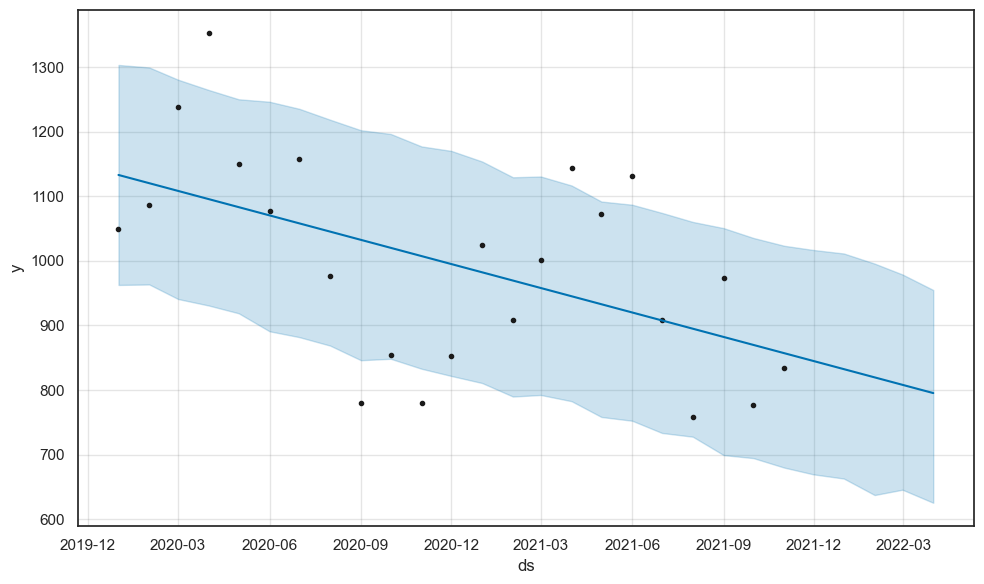

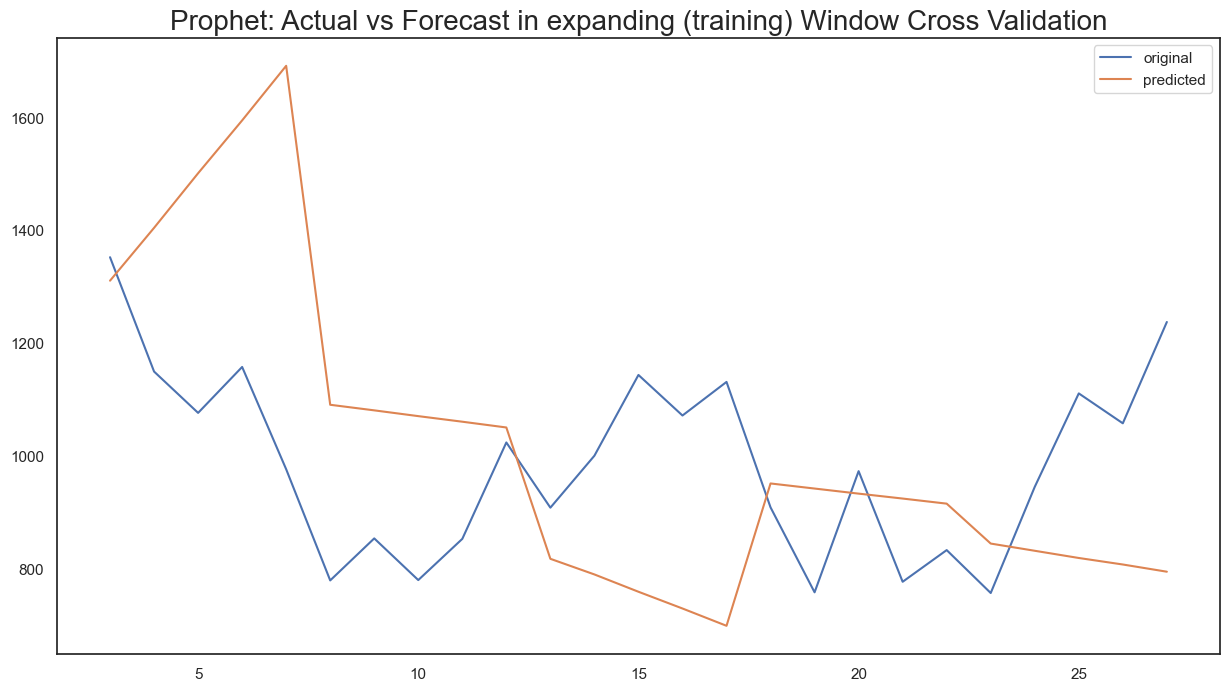

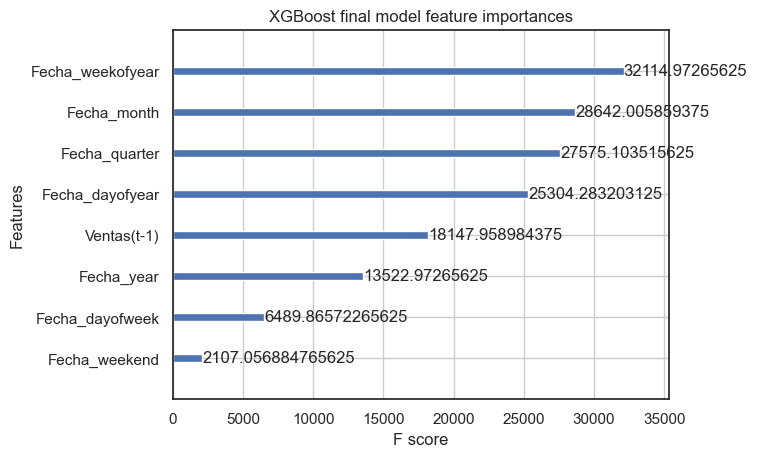

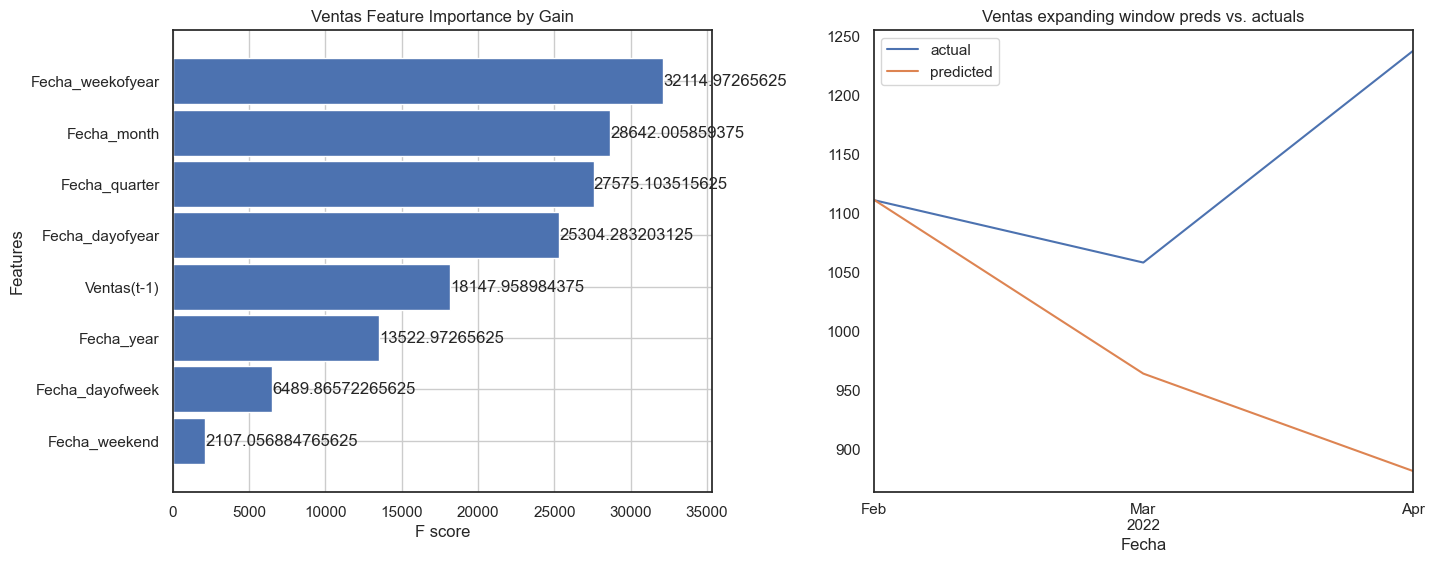

In [87]:
model.fit(
    traindata=train_df,
    ts_column=train_df.index.name,
    target='Ventas'
)

#### ARIMA

Dado que AutoTs no creo un modelo ARIMA, se hará uno por separado.

In [88]:
model_arima = pm.auto_arima(train_df, 
                      seasonal=True,    
                      m=12,           
                      stepwise=True, 
                      trace=True)      

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=367.567, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=357.863, Time=0.10 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=359.569, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=468.996, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=356.494, Time=0.01 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=358.040, Time=0.09 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=359.890, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=358.466, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=358.454, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=358.111, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=inf, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 0.842 seconds


In [89]:
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   28
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -175.247
Date:                Wed, 13 Nov 2024   AIC                            356.494
Time:                        16:12:30   BIC                            360.490
Sample:                    01-01-2020   HQIC                           357.715
                         - 04-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    357.9432    202.869      1.764      0.078     -39.673     755.560
ar.L1          0.6474      0.198      3.271      0.001       0.259       1.035
sigma2      1.623e+04   7598.588      2.135      0.0

### Comparación de Modelos

In [90]:
forecast_autots = model.predict(testdata=test_df)
forecast_arima = model_arima.predict(n_periods=len(test_df))
forecast = pd.DataFrame()
forecast['AutoTs'] = forecast_autots['yhat']
forecast['ARIMA'] = forecast_arima

Predicting using test dataframe shape = (8, 1) for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    Using given input: pandas dataframe...
    Alert: No strf_time_format given for Fecha. Provide strf_time format during "setup" for better results.
ML predictions completed


**El mejor modelo de AutoTs el de ML**

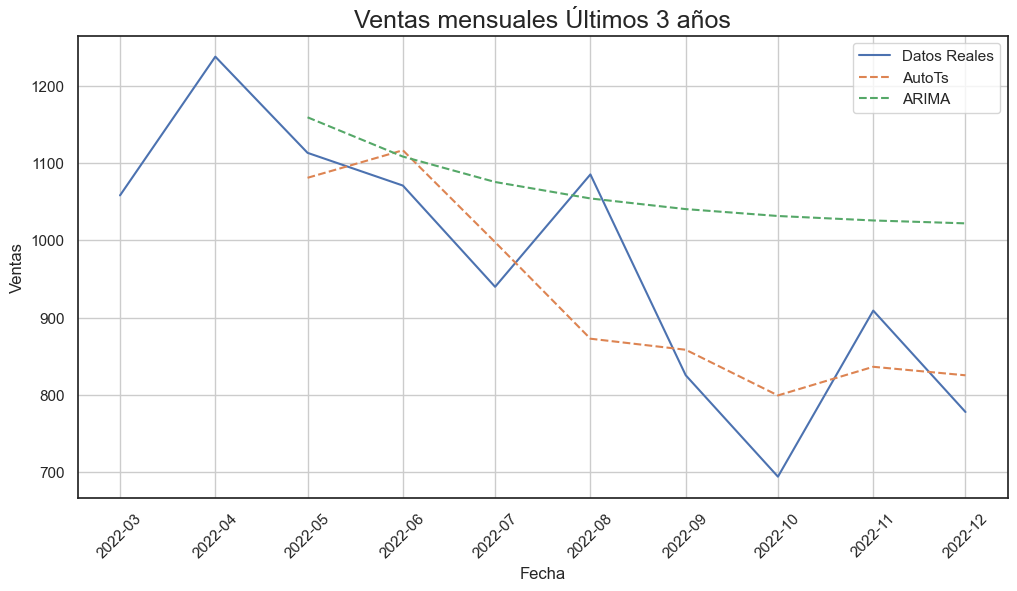

In [91]:
plt.figure(figsize=(12,6))
plt.plot(sales.index[-10:], sales['Ventas'][-10:], label='Datos Reales')
plt.plot(forecast.index, forecast['AutoTs'], linestyle='--', label='AutoTs')
plt.plot(forecast.index, forecast['ARIMA'], linestyle='--', label='ARIMA')
plt.title('Ventas mensuales Últimos 3 años', fontsize=18)
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [92]:
rmse_autots = mean_squared_error(test_df['Ventas'], forecast['AutoTs'] , squared=False)
rmse_arima = mean_squared_error(test_df['Ventas'], forecast['ARIMA'] , squared=False)
print(f'RMSE ML: {rmse_autots:.2f}')
print(f'RMSE ARIMA: {rmse_arima:.2f}')

RMSE ML: 94.40
RMSE ARIMA: 178.86


### Pronósticos

Dado que el modelo ML es el que tiene menor RMSE, es el que se elegirá para los pronósticos.

Predicting using test dataframe shape = (12, 0) for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    Using given input: pandas dataframe...
    Alert: No strf_time_format given for Fecha. Provide strf_time format during "setup" for better results.
    converting testdata to datetime index erroring. Please check input and try again.
ML predictions completed


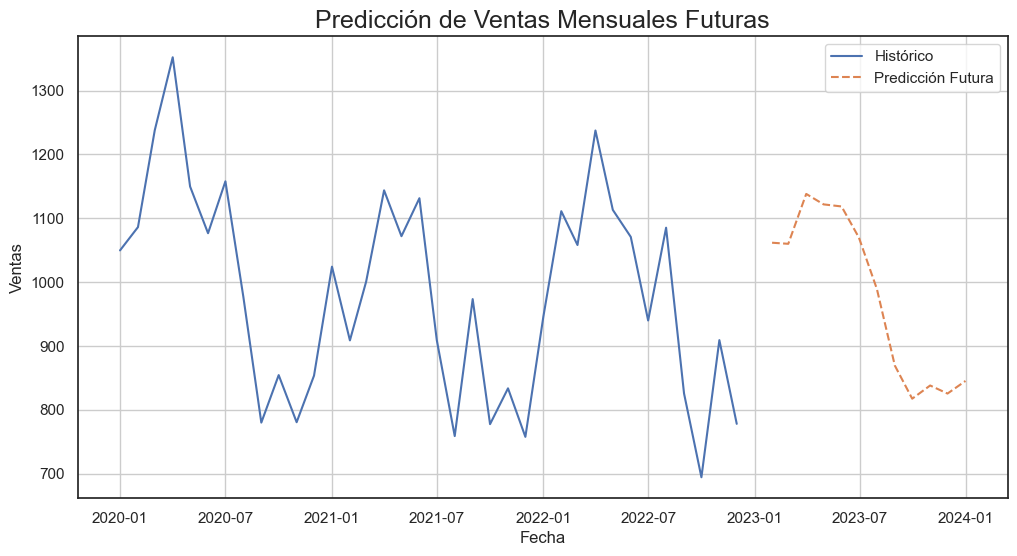

In [93]:
future_periods = 12
last_date = sales.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=future_periods, freq='M')

future_df = pd.DataFrame(index=future_dates)
future_forecast = model.predict(testdata=future_df)

plt.figure(figsize=(12,6))
plt.plot(sales.index, sales['Ventas'], label='Histórico')
plt.plot(future_dates, future_forecast['yhat'], label='Predicción Futura', linestyle='--')
plt.title('Predicción de Ventas Mensuales Futuras', fontsize=18)
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()

---

## Parte 2: Análisis de Satisfacción del Cliente con SEM (25 puntos)

**Contexto**  
DataMart Solutions quiere mejorar la satisfacción del cliente en su plataforma de servicios de análisis. Han identificado factores clave como la **confianza en la plataforma** y la **calidad del servicio** que afectan directamente la satisfacción del cliente. Además, creen que el **tamaño de la empresa** del cliente podría influir en estos factores.

**Ejercicio**  
1. **Construcción del Modelo SEM (15 puntos):**  
   - Construye un modelo SEM que incluya las variables latentes **confianza en la plataforma** (medida por `Seguridad`, `Facilidad de Uso` y `Recomendaciones`) y **calidad del servicio** (medida por `Tiempo de Respuesta` y `Resolución de Problemas`).
   - Genera un gráfico de las trayectorias y muestra las cargas factoriales y coeficientes de cada relación en el modelo.

2. **Interpretación y Recomendación de Mejora (10 puntos):**  
   - Con base en los resultados del modelo SEM, responde lo siguiente:
     - ¿Qué impacto tienen la **confianza en la plataforma** y la **calidad del servicio** en la **satisfacción del cliente**?
   - Proporciona dos recomendaciones para que DataMart mejore la satisfacción del cliente, basadas en los hallazgos del modelo.




### Construcción del modelo SEM

In [97]:
satisfaccion = pd.read_csv('satisfaccion_cliente.csv')
satisfaccion.head()

,Uso,Seguridad,Recomendaciones,Tiempo_Respuesta,Resolucion_Problemas,Tamaño_Empresa,Satisfaccion
0,4.248357,3.999659,3.550083,4.310602,3.904587,3,4.638329
1,3.930868,3.762814,2.960261,4.081998,3.587917,3,5.392772
2,4.323844,4.548032,3.632997,4.208623,3.812221,1,5.766516
3,4.761515,4.944626,4.080340,4.583536,4.233842,3,5.530198
4,3.882923,3.876653,3.189026,4.257330,3.841369,2,3.860665


In [117]:
model_desc = """
# Latent Variables
Confianza =~ Seguridad + Uso + Recomendaciones
Calidad =~ Tiempo_Respuesta + Resolucion_Problemas

Satisfaccion =~ Confianza + Calidad
"""

mod = Model(model_desc)
res_opt = mod.fit(satisfaccion)
estimates = mod.inspect()

# Imprimir los resultados del ajuste del modelo
print(estimates)

                    lval  op                  rval  Estimate  Std. Err  \
0              Confianza   ~          Satisfaccion  1.000000         -   
1                Calidad   ~          Satisfaccion  0.110509  0.053159   
2              Seguridad   ~             Confianza  1.000000         -   
3                    Uso   ~             Confianza  1.024324  0.039906   
4        Recomendaciones   ~             Confianza  0.803724  0.036716   
5       Tiempo_Respuesta   ~               Calidad  1.000000         -   
6   Resolucion_Problemas   ~               Calidad  1.329406  0.673004   
7                Calidad  ~~               Calidad  0.059596  0.030614   
8              Confianza  ~~             Confianza  0.140360  0.035687   
9           Satisfaccion  ~~          Satisfaccion  0.089661  0.034227   
10       Recomendaciones  ~~       Recomendaciones  0.039543  0.004177   
11  Resolucion_Problemas  ~~  Resolucion_Problemas  0.003601  0.054115   
12             Seguridad  ~~          

In [112]:
g = semplot(mod, 'pd.png')

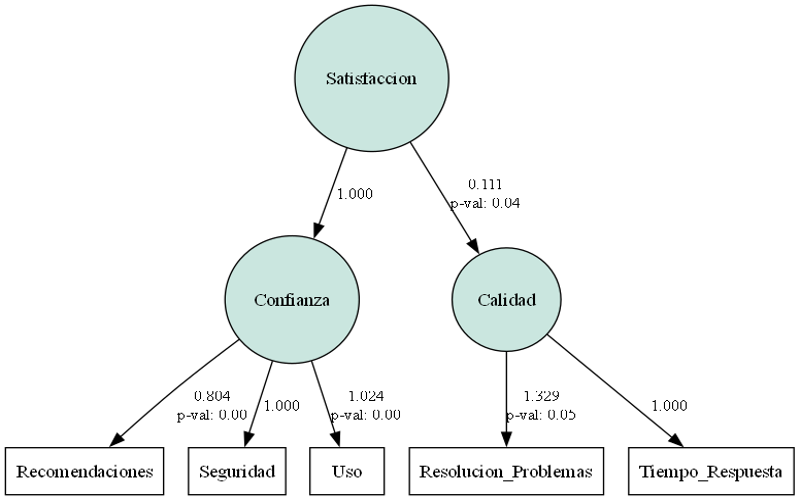

In [116]:
img = Image.open("pd.png")
img_resized = img.resize((800, 500))
display(img_resized)

---

## Parte 3: Estrategia de Precios con Pruebas A/B (25 puntos)

**Contexto**  
DataMart Solutions está considerando un ajuste en el precio de uno de sus servicios de suscripción mensual. Actualmente, el precio es de **50 USD** al mes, y la empresa quiere evaluar el impacto de un aumento a **60 USD** en el ingreso promedio por usuario y la tasa de conversión.

**Ejercicio**
1. **Diseño de la Prueba A/B (10 puntos):**  
   - Define una prueba A/B en la que el **Grupo A** ve el precio original (50 USD) y el **Grupo B** ve el nuevo precio (60 USD).
   - Calcula el tamaño mínimo de muestra necesario para cada grupo si se espera que el cambio de precio aumente la tasa de conversión en un 1% (de 6% a 7%) con un nivel de confianza del 95% y un poder estadístico del 80%.  
   *Nota*: Usa una prueba de hipótesis de una cola, asumiendo que solo un aumento en la tasa de conversión es relevante.

2. **Análisis de Resultados de la Prueba (10 puntos):**  
   - Supón que obtuviste los siguientes resultados:
     - **Grupo A**: Tasa de conversión del 6% (600 de 10,000 usuarios)
     - **Grupo B**: Tasa de conversión del 5.5% (550 de 10,000 usuarios)
   - Realiza una prueba z de una cola para dos proporciones, evaluando si la tasa de conversión del Grupo B es significativamente mayor que la del Grupo A. Interpreta los resultados y discute si Meta debería implementar el cambio de precio en función del aumento en la tasa de conversión.

3. **Evaluación del Ingreso por Usuario y Decisión (5 puntos):**  
   - Calcula si el ingreso promedio por usuario en el Grupo B es significativamente mayor que en el Grupo A y si cumple con el objetivo de incrementar el ingreso por usuario en **$10**. ¿Recomendarías a Meta proceder con el aumento de precio?



### Prueba de hipótesis de tasa conversión:
- $H_0: \Delta TC \leq 1$
- $H_i: \Delta TC > 1$

### Prueba de hipótesis de tasa ARPU:
- $H_0: \Delta TC \leq 20$
- $H_i: \Delta TC > 20$

### Tamaños de muestra 

In [144]:
ab_data = pd.read_csv('ab_test_data.csv')
ab_data.head()

,Group,Converted,Revenue
0,A,0,0
1,A,0,0
2,A,0,0
3,A,0,0
4,A,0,0


In [142]:
a_conversion, b_conversion = ab_data.groupby('Group')['Converted'].mean()
a_arpu, b_arpu = ab_data.groupby('Group')['Revenue'].mean()
print('Tasa de Conversión A:', a_conversion)
print('Tasa de Conversión B:', b_conversion)
print()
print('ARPU A:', a_arpu)
print('ARPU B:', b_arpu)

Tasa de Conversión A: 0.0607
Tasa de Conversión B: 0.0552

ARPU A: 3.035
ARPU B: 3.312


In [146]:
conversion_size = math.ceil((2*((1.96+0.84)**2)*0.06*(1-0.06))/(0.01)**2)

print('El tamaño de muestra requerido para probar el crecimiento de la tasa de conversión es de:', conversion_size)

El tamaño de muestra requerido para probar el crecimiento de la tasa de conversión es de: 8844


---

## Parte 4: Optimización de Presupuesto de Marketing (25 puntos)

**Contexto**  
DataMart Solutions está lanzando una nueva campaña de adquisición de clientes y cuenta con un presupuesto total de **20,000 USD**. La empresa quiere maximizar el número de clientes adquiridos utilizando varios canales de adquisición, pero cada canal tiene un **costo incremental** a medida que se adquieren más clientes.

**Canales de Adquisición de Clientes**  
1. **Google Ads CAC:** Costo inicial de 20 USD por cliente, más un incremento de 0.10 USD por cliente adicional.
2. **Facebook Ads CAC:** Costo inicial de 15 USD por cliente, más un incremento de 0.08 USD por cliente adicional.
3. **Marketing de Contenidos CAC:** Costo inicial de 10 USD por cliente, más un incremento de 0.05 USD por cliente adicional.
4. **LinkedIn Ads CAC:** Costo inicial de 25 USD por cliente, más un incremento de 0.12 USD por cliente adicional.

**Ejercicio**  
1. **Optimización del Presupuesto (15 puntos):**  
   - Define una función de Python que utilice `scipy.optimize.minimize` para maximizar el número total de clientes adquiridos en todos los canales, sujeto a la restricción de presupuesto de 20,000 USD.
   - Por canal de adquisición, muestra la cantidad óptima de clientes adquiridos y el costo total estimado.

2. **Análisis de Resultados y Recomendación (10 puntos):**  
   - Explica qué canales resultaron más efectivos en términos de costo y rendimiento.
   - Si el objetivo cambiara de maximizar el número de clientes a maximizar el **ingreso por cliente** (asumiendo diferentes valores de ingreso promedio por cliente en cada canal), ¿cómo cambiaría la estrategia de asignación de presupuesto?


### Funciones de CAC

In [147]:
def cac_google_ads(users):
    return 20 + 0.01 * users

def cac_facebook_ads(users):
    return 15 + 0.08 * users

def cac_content_marketing(users):
    return 10 + 0.05 * users

def cac_linkedin(users):
    return 25 + 0.12 * users

### Problema de Optimización

In [150]:
budget = 20000

# Función de usuarios totales a maximizar
def total_users(x):
    google_users, fb_users, content_users, linkedin_users = x
    return -1 * (google_users + fb_users + content_users + linkedin_users)

# Función de costo total, sujeto a la restricción del presupuesto
def total_cost(x):
    google_users, fb_users, content_users, linkedin_users = x
    return (google_users * cac_google_ads(google_users) +
            fb_users * cac_facebook_ads(fb_users) +
            content_users * cac_content_marketing(content_users) +
            linkedin_users * cac_linkedin(linkedin_users))

# Restricción de Presupuesto
constraints = [
    {'type': 'ineq', 'fun': lambda x: budget - total_cost(x)}
]

# No negatividad
bounds = [(0, None), (0, None), (0, None), (0, None)]

# Xo
initial_guess = [100, 100, 100, 100]

# Resolver el problema de optimización
result = minimize(total_users, initial_guess, constraints=constraints, bounds=bounds)

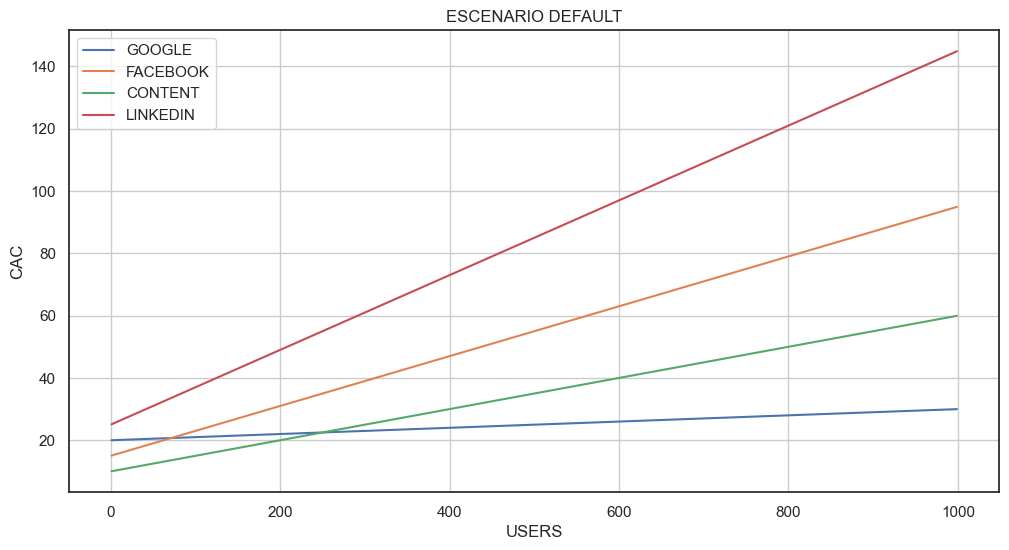

In [151]:
df = pd.DataFrame(list(range(1,1000,1)))

df['cac_google'] = df[0].apply(lambda x: cac_google_ads(x))
df['cac_facebook'] = df[0].apply(lambda x: cac_facebook_ads(x))
df['cac_content'] = df[0].apply(lambda x: cac_content_marketing(x))
df['cac_linkedin'] = df[0].apply(lambda x: cac_linkedin(x))
plt.figure(figsize=(12,6))
plt.plot(df[0], df['cac_google'], label='GOOGLE')
plt.plot(df[0], df['cac_facebook'],  label='FACEBOOK')
plt.plot(df[0], df['cac_content'],  label='CONTENT')
plt.plot(df[0], df['cac_linkedin'], label='LINKEDIN')
plt.title('ESCENARIO DEFAULT')
plt.legend(loc='best')
plt.xlabel('USERS')
plt.ylabel('CAC')
plt.grid()

### Usuarios adquiridos y costo por canal

In [183]:
# Número de usuarios adquiridos por canal
optimal_users = result.x
google_users, fb_users, content_users, linkedin_users = optimal_users

# Costo por canal reemplazando en las funciones de CAC
spend_google = google_users * cac_google_ads(google_users)
spend_fb = fb_users * cac_facebook_ads(fb_users)
spend_content = content_users * cac_content_marketing(content_users)
spend_linkedin = linkedin_users * cac_linkedin(linkedin_users)

# Imprimir Resultados
print('---Usuarios obtenidos por canal:---')
print(f'Google Ads:               {int(optimal_users[0])}')
print(f'FaceBook Ads:             {int(optimal_users[1])}')
print(f'Marketing de Contenidos:  {int(optimal_users[2])}')
print(f'LinkedIn:                 {int(optimal_users[3])}')

print('\n---Asignación de Capital por canal:---')
print(f'Google Ads:               ${spend_google:.2f}')
print(f'FaceBook Ads:             ${spend_fb:.2f}')
print(f'Marketing de Contenidos:  ${spend_content:.2f}')
print(f'LinkedIn:                 ${spend_linkedin:.2f}')

print('\n---Costo promedio por usuario en cada canal:---')
print(f'Google Ads:               ${spend_google/int(optimal_users[0]):.4f}')
print(f'FaceBook Ads:             ${spend_fb/int(optimal_users[1]):.4f}')
print(f'Marketing de Contenidos:  ${spend_content/int(optimal_users[2]):.4f}')
print(f'LinkedIn:                 ${spend_linkedin/int(optimal_users[3]):.4f}')

print('\n---Total:---')
print(f'Costo total estimado: ${total_cost(result.x):,.4f}')
print(f'Usuarios totales adquiridos: {int(-result.fun)}')

---Usuarios obtenidos por canal:---
Google Ads:               519
FaceBook Ads:             96
Marketing de Contenidos:  203
LinkedIn:                 22

---Asignación de Capital por canal:---
Google Ads:               $13080.59
FaceBook Ads:             $2181.94
Marketing de Contenidos:  $4116.16
LinkedIn:                 $621.31

---Costo promedio por usuario en cada canal:---
Google Ads:               $25.2035
FaceBook Ads:             $22.7285
Marketing de Contenidos:  $20.2766
LinkedIn:                 $28.2415

---Total:---
Costo total estimado: $20,000.0000
Usuarios totales adquiridos: 841


### Conclusiones

- Aunque el costo inicial de Google es el tercero más elevado, tiene el incremento de costo por cliente adicional mas pequeño. Por lo que al final fue el canal que captó más usuarios.
- Aunque el costo promedio por usuario de Google es el tercero más elevado, hay que tomar en cuenta que fue el que captó mas clientes con bastante diferencia.
- LinkedIn es el canal con costo inicial mas alto y costo por cliente adicional mas alto. Por lo que que solo se destinan pocos dólares en ese canal.
- Google y Content que a priori son los canales mas baratos, con el tiempo crece mucho su costo, lo que hace que, aunque atrajeron muchos clientes, no sean igualmente significativos como los Google Ads.

---

## Parte Extra (Opcional, 5 puntos): Uso de AI Generativa

**Contexto**  
DataMart Solutions ofrece un servicio de asesoría de Inteligencia Artificial. Uno de sus clientes, los promotores de seguros "No hay nada más seguro que la muerte SA de CV", busca implementar la atención personalizada y automatizada de sus clientes usando IA.

**Ejercicio Opcional**  
1. **Define qué deberán usar (2.5 puntos):**  
   - Explica los componentes y herramientas clave que deberán emplear para cumplir el requisito del cliente, incluyendo cómo integrar cada uno.

2. **Contesta la siguiente duda del dueño:**  
   - Explica por qué no es adecuado hacer esto a través de la interfaz gráfica de https://chatgpt.com/.

### Propuesta de Uso